In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [12]:
data=pd.read_csv("Honda_Data.csv")
data.head(5)

,Date,Adj_Close,Close,High,Low,Open,Volume
0,1980-03-17,0.547989,0.893750,0.909375,0.893750,0.893750,26000
1,1980-03-18,0.557569,0.909375,0.909375,0.909375,0.909375,2000
2,1980-03-19,0.551821,0.900000,0.900000,0.900000,0.900000,2000
3,1980-03-20,0.551821,0.900000,0.900000,0.900000,0.900000,0
4,1980-03-21,0.551821,0.900000,0.900000,0.900000,0.900000,2000


In [13]:
data.isnull().sum()

Date         0
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11293 entries, 0 to 11292
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11293 non-null  object 
 1   Adj_Close  11293 non-null  float64
 2   Close      11293 non-null  float64
 3   High       11293 non-null  float64
 4   Low        11293 non-null  float64
 5   Open       11293 non-null  float64
 6   Volume     11293 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 617.7+ KB


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Date"]=pd.to_datetime(data["Date"])
data.set_index("Date",inplace=True)

<Axes: xlabel='Date', ylabel='Close'>

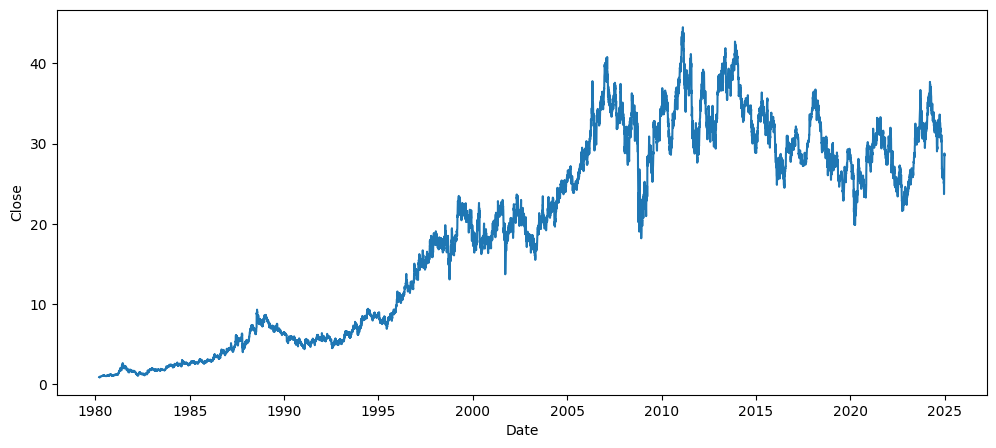

In [19]:
plt.figure(figsize=(12,5))
sns.lineplot(x="Date",y="Close",data=data)

In [21]:
df=data[["Close"]].values

In [22]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler_data=scaler.fit_transform(df)

In [23]:
def create_sequence(df,sequence_length):
    X=[]
    y=[]
    for i in range (sequence_length,len(df)):
        X.append(df[i-sequence_length:i,0])
        y.append(df[i,0])
    return np.array(X),np.array(y)

In [24]:
sequence_length=10

In [25]:
X,y=create_sequence(scaler_data,sequence_length)

In [26]:
X=X.reshape((X.shape[0],X.shape[1],1))
print(X.shape,y.shape)

(11283, 10, 1) (11283,)


In [29]:
model = Sequential()
model.add(LSTM(50,activation="relu",input_shape=(X.shape[1],X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mean_squared_error")
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(X,y,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0467
Epoch 2/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0041
Epoch 3/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0035
Epoch 4/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0029
Epoch 5/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0027
Epoch 6/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023
Epoch 7/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021
Epoch 8/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020
Epoch 9/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019
Epoch 10/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019
Epoch 11/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018
Epoch 12/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018
Epoch 13/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018
Epoch 14/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018
Epoch 15/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1

In [31]:
loss=model.evaluate(X,y)
print("Model loss:",loss)

353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 1.1402e-04
Model loss: 0.00015680638898629695


In [32]:
predictions=model.predict(X)
predictions=scaler.inverse_transform(predictions)
print(predictions[:10])

353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step
[[1.3646159]
 [1.3849034]
 [1.3740065]
 [1.3680614]
 [1.3605815]
 [1.3699591]
 [1.3731811]
 [1.3743366]
 [1.3864462]
 [1.3953573]]


In [33]:
actual_values=scaler.inverse_transform(y.reshape(-1,1))

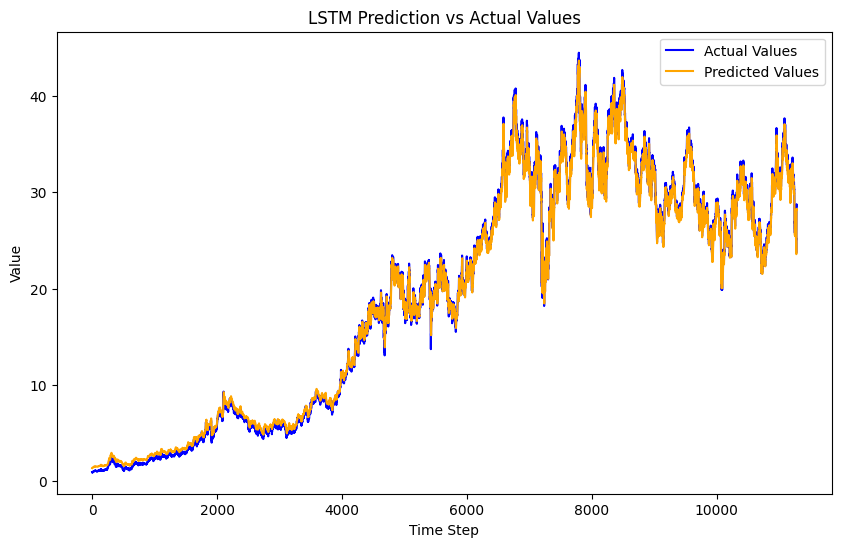

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values",color="blue")  
plt.plot(predictions, label="Predicted Values",color="orange") 
plt.legend()
plt.title('LSTM Prediction vs Actual Values')  
plt.xlabel('Time Step') 
plt.ylabel('Value')  
plt.show()